# Case Study

# Data Acquisition

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings  
warnings.filterwarnings("ignore")

In [2]:
# Load a dataset (using seaborn's built-in 'taxis' dataset as an example)
# df=pd.read_csv('Store.csv')
df = pd.read_csv('Store.csv')

# Data Preparation
- Data Exploration
- Data Cleaning
- Missing value treatments
- Outlier handling
- Data encoding techniques
- Feature engineering
- Challenges of high dimensionality
- Dimension reduction using principal component analysis

# Explore the data

In [3]:
# Display the shape of the DataFrame.
print(df.shape,"\n")

print('number of rows', df.shape[0])
print('number of columns',df.shape[1],"\n")

# Display the column labels
print(df.columns,"\n")

(9994, 22) 

number of rows 9994
number of columns 22 

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object') 



In [4]:
# Display the first three  and last three rows
print(df.head(3),"\n")
print(df.tail(3),"\n")

   Unnamed: 0  Row ID        Order ID  Order Date   Ship Date     Ship Mode  \
0           0       1  CA-2013-152156  11-09-2013  11-12-2013  Second Class   
1           1       2  CA-2013-152156  11-09-2013  11-12-2013  Second Class   
2           2       3  CA-2013-138688   6/13/2013   6/17/2013  Second Class   

  Customer ID    Customer Name    Segment        Country  ... Postal Code  \
0    CG-12520      Claire Gute   Consumer  United States  ...       42420   
1    CG-12520      Claire Gute   Consumer  United States  ...       42420   
2    DV-13045  Darrin Van Huff  Corporate  United States  ...       90036   

  Region       Product ID         Category Sub-Category  \
0  South  FUR-BO-10001798        Furniture    Bookcases   
1  South  FUR-CH-10000454        Furniture       Chairs   
2   West  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.96    

In [5]:
# Display the concise summary of a DataFrame.
print(df.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9994 non-null   int64  
 1   Row ID         9994 non-null   int64  
 2   Order ID       9994 non-null   object 
 3   Order Date     9994 non-null   object 
 4   Ship Date      9994 non-null   object 
 5   Ship Mode      9994 non-null   object 
 6   Customer ID    9994 non-null   object 
 7   Customer Name  9994 non-null   object 
 8   Segment        9994 non-null   object 
 9   Country        9994 non-null   object 
 10  City           9994 non-null   object 
 11  State          9994 non-null   object 
 12  Postal Code    9994 non-null   int64  
 13  Region         9994 non-null   object 
 14  Product ID     9994 non-null   object 
 15  Category       9994 non-null   object 
 16  Sub-Category   9994 non-null   object 
 17  Product Name   9994 non-null   object 
 18  Sales   

In [6]:
# Retrieve the data types of each column
print(df.dtypes,"\n")

Unnamed: 0         int64
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object 



In [7]:
# how many columns are of integer type
print('number of columns of integer type', df.select_dtypes(include='int64').shape[1])
# how many columns are of category type
print('number of columns of object type', df.select_dtypes(include='category').shape[1])
# how many columns are of float type
print('number of columns of float type', df.select_dtypes(include='float64').shape[1])

number of columns of integer type 4
number of columns of object type 0
number of columns of float type 3


In [8]:
# identify the unique values
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [9]:
# Summary statistics of numeric (int and float) data
df.describe()

,Unnamed: 0,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4996.500000,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,0.000000,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2498.250000,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4996.500000,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7494.750000,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9993.000000,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
product_id_counts = df['Product ID'].value_counts()

# Display the counts
print(product_id_counts)

OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
FUR-CH-10001146    15
TEC-AC-10003628    15
                   ..
TEC-PH-10003535     1
TEC-MA-10002937     1
OFF-AR-10004974     1
TEC-AC-10004814     1
OFF-ST-10001627     1
Name: Product ID, Length: 1862, dtype: int64


In [11]:
# Summary statistics  of category data

# df.describe(include="Product ID")

In [12]:
# Identify duplicate data
# data[data.duplicated()==True]
df[df.duplicated()].sum()

Unnamed: 0       0.0
Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64

In [13]:
# summary of unique values and their counts (frequency)
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [14]:
# summary of unique values and their counts (Relative Frequency)
df['Region'].value_counts(normalize=True)

West       0.320492
East       0.284971
Central    0.232439
South      0.162097
Name: Region, dtype: float64

In [15]:
# Groupby and aggregation:
# df.groupby('Region')['store'].count()
df.groupby('Region')['Sales'].sum()

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [16]:
df.groupby('City')['Sales'].sum()

City
Aberdeen         25.500
Abilene           1.392
Akron          2729.986
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Sales, Length: 531, dtype: float64

In [17]:
# Pivot table
df.pivot_table(values='Order ID', index='City', columns='Sub-Category', aggfunc='sum')

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
City,,,,,,,,,,,,,,,,,
Aberdeen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2014-167976,NaN
Abilene,NaN,CA-2014-165099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akron,US-2012-147662CA-2013-136770,NaN,CA-2014-109757US-2012-147662,CA-2014-109757CA-2014-109757US-2012-147662US-2...,NaN,NaN,NaN,NaN,CA-2013-102596,CA-2011-164224,NaN,NaN,CA-2014-105074CA-2011-164224CA-2014-109757CA-2...,US-2012-147662CA-2013-136770CA-2013-136770,CA-2014-147277CA-2014-166576,NaN,CA-2014-147277
Albuquerque,CA-2014-168655CA-2014-106859,NaN,US-2011-134054,CA-2014-168655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA-2014-106859CA-2014-106859US-2014-103226CA-2...,CA-2014-106859CA-2011-152345CA-2011-100881,CA-2014-106859CA-2011-152345CA-2014-122798,NaN,NaN
Alexandria,NaN,NaN,CA-2011-102988CA-2011-102988,NaN,NaN,NaN,NaN,NaN,CA-2014-110926,US-2011-155502US-2011-155502CA-2012-104241,NaN,NaN,US-2011-155502US-2011-155502CA-2011-102988,US-2011-155502US-2011-155502CA-2011-102988,CA-2011-138296US-2011-155502CA-2013-164735,CA-2011-102988,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woonsocket,NaN,NaN,NaN,CA-2014-108749,NaN,NaN,NaN,NaN,NaN,CA-2011-122588,NaN,NaN,CA-2014-108749,NaN,CA-2012-119102,NaN,NaN
Yonkers,CA-2014-160416CA-2011-169061,NaN,CA-2011-169061,CA-2011-135755CA-2011-135755CA-2011-169061,NaN,NaN,NaN,NaN,NaN,CA-2014-108791,NaN,US-2013-143819US-2014-114657,US-2013-143819CA-2011-169061,CA-2014-108791,US-2013-143819,CA-2011-169061,US-2013-143819
York,NaN,NaN,NaN,US-2013-152051CA-2014-169404,NaN,US-2013-152051,NaN,NaN,NaN,NaN,NaN,NaN,CA-2014-169404,NaN,US-2013-152051,NaN,NaN


# Data Visualization

# Univariate Analysis : Explore individual variables:

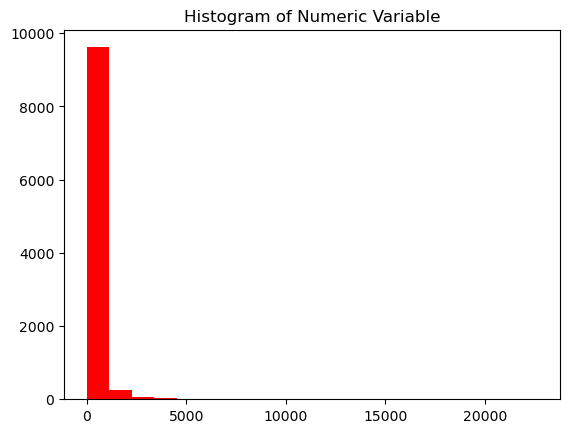

In [18]:
# Histogram for a numeric variable
plt.hist(df['Sales'], bins=20, color='red')
plt.title('Histogram of Numeric Variable')
plt.show()

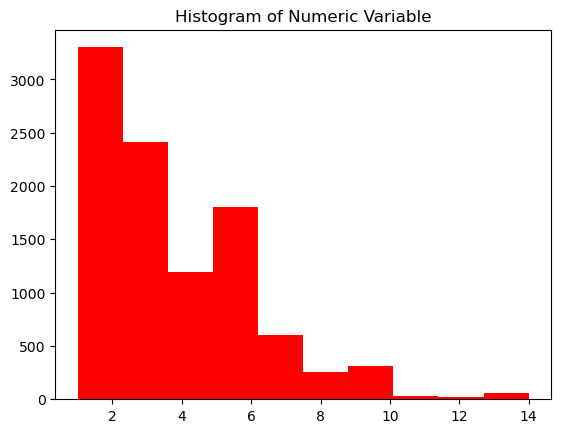

In [19]:
# Histogram for a numeric variable
plt.hist(df['Quantity'], bins=10, color='red')
plt.title('Histogram of Numeric Variable')
plt.show()

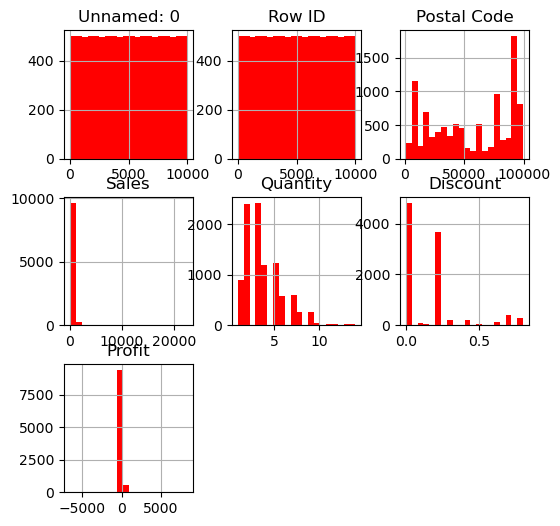

In [20]:
# Histogram for all numeric variable
df.hist(figsize=(6,6), bins=20, color='red')
plt.show()

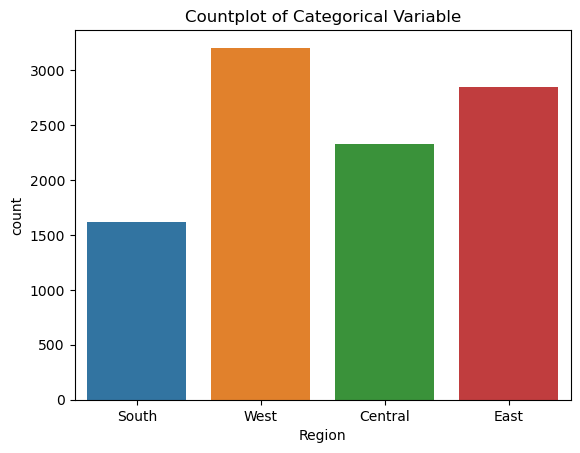

In [21]:
# Countplot for a categorical variable
sns.countplot(x='Region', data=df)
plt.title('Countplot of Categorical Variable')
plt.show()

<Axes: xlabel='Category'>

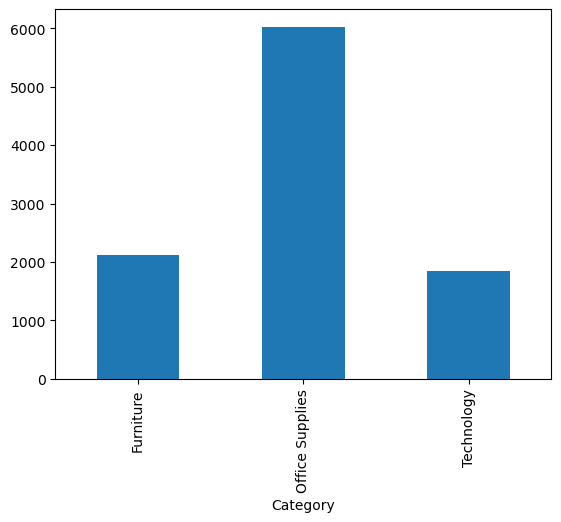

In [22]:
df.groupby('Category')['Sales'].count().plot(kind='bar')

<Axes: xlabel='Sales'>

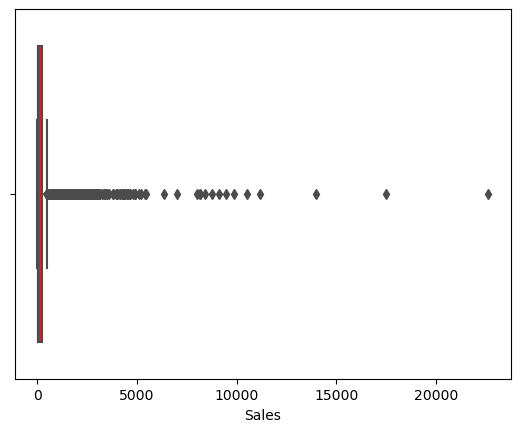

In [23]:
sns.boxplot(data=df, x='Sales',color="red")

<Axes: xlabel='Sales'>

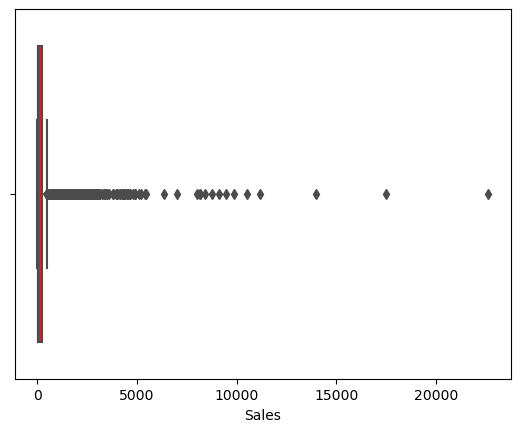

In [24]:
sns.boxplot(data=df, x='Sales',color="red")

# Bivariate Analysis : Explore relationships between two variables:

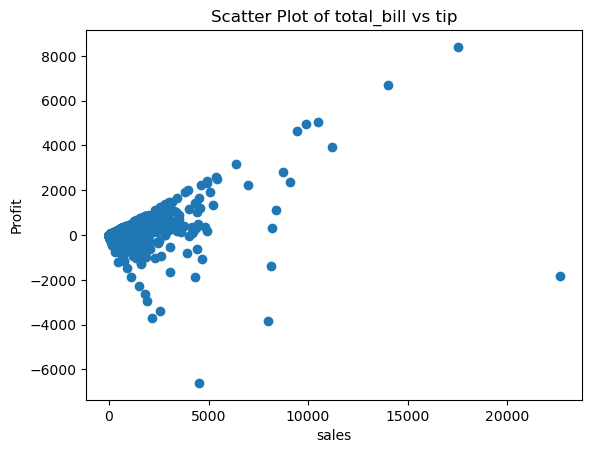

In [25]:
# Scatter plot for two numeric variables
plt.scatter(df['Sales'], df['Profit'])
plt.title('Scatter Plot of total_bill vs tip')
plt.xlabel('sales')
plt.ylabel('Profit')
plt.show()

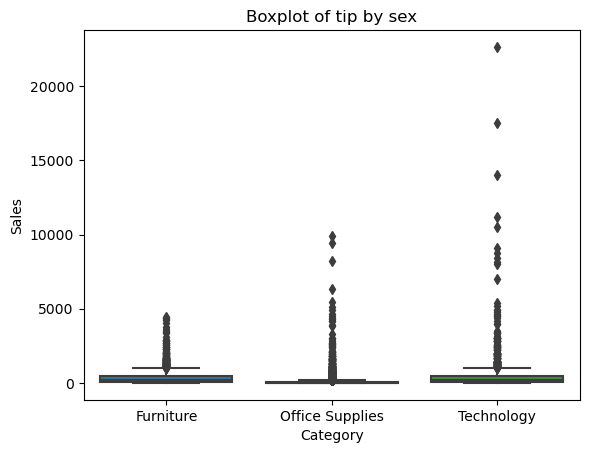

In [26]:
# Boxplot for a numeric variable vs. a categorical variable
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Boxplot of tip by sex')
plt.show()

In [27]:
# Stacked Histogram
category=pd.crosstab(df['Category'],df['Region'])
category

Region,Central,East,South,West
Category,,,,
Furniture,481,601,332,707
Office Supplies,1422,1712,995,1897
Technology,420,535,293,599


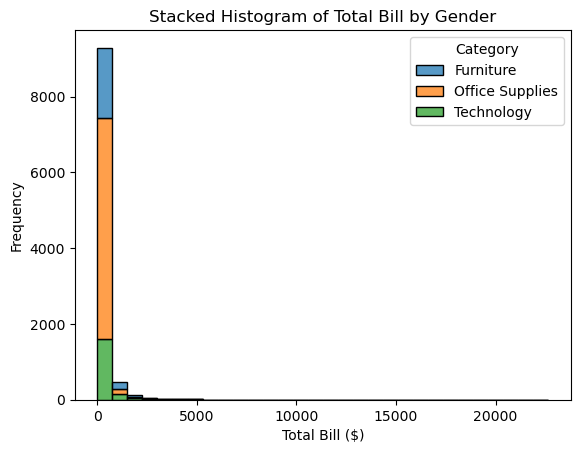

In [28]:
# Create a stacked histogram
sns.histplot(data=df, x="Sales", hue="Category", multiple="stack", bins=30)

# Set plot labels and title
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")
plt.title("Stacked Histogram of Total Bill by Gender")

# Show the plot
plt.show()

# Data Cleaning

In [29]:
# Identify the missing values under each column
df.isnull().sum()

Unnamed: 0       0
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [30]:
# Total missing values
df.isnull().sum().sum()

0

In [31]:
# % missing values
(df.isnull().sum().sum()/len(df))*100

0.0

## Impute the missing data

In [32]:
# percentage of missing data whandling based on the domain knowledge

# <5% - remove the rows which are having missing values (Deletion)

# 5% to 10% - impute using mean, median (numeric data) or mode(non-numeric data)
# 5% to 10% - forward fill/backward fill (is used for time-series data)

# 10% to 20% - regression, KNN imputation, interpolation

# >20% - drop that column / attribute based on the relevance 
# >20% - factorization, random techniques

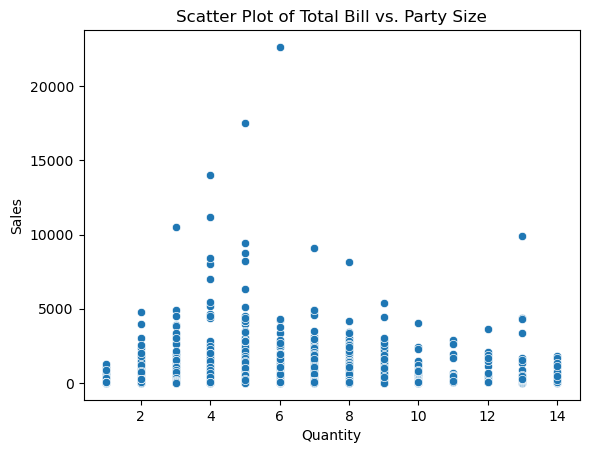

In [33]:
#Visualize the relationship
sns.scatterplot(x='Quantity', y='Sales', data=df)
plt.title('Scatter Plot of Total Bill vs. Party Size')
plt.show()

# Model Planning

## Linear Regression

In [34]:
# Assumptions of linear regression include:

# Linearity: The relationship between the dependent and independent variables is linear.
# Independence: The observations are independent of each other.
# Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
# Normality: The errors follow a normal distribution.
# No multicollinearity: The independent variables are not highly correlated with each other.
# No endogeneity: There is no relationship between the errors and the independent variables.

In [35]:
# drop the unique data column
#df_copy=df.drop(df['empid'])

In [36]:
# Split the data into training and testing sets
X = df[['Quantity']]  # Independent variable
y = df['Sales']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Perform linear regression
taxis_model = LinearRegression()
taxis_model.fit(X_train, y_train)
print(taxis_model)

LinearRegression()


In [38]:
# Make predictions on the test set
predictions = taxis_model.predict(X_test)
predictions

array([237.72002251, 132.32347789, 132.32347789, ..., 185.0217502 ,
       132.32347789, 290.41829482])

In [39]:
# Assess the model and assumptions
# Check residuals (errors)
residuals = y_test - predictions
residuals

3125    326.087977
1441    -95.651478
4510    -95.023478
39       27.036250
4509    -13.733750
           ...    
9956   -244.068295
1561    -76.845206
1670   -168.341750
6951    347.664522
3910     62.031705
Name: Sales, Length: 1999, dtype: float64

In [40]:
# Interpret the results and make conclusions
print(f'Intercept: {taxis_model.intercept_}')
print(f'Coefficient for size: {taxis_model.coef_}')

Intercept: 26.926933267190975
Coefficient for size: [52.69827231]


In [41]:
# Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 567865.6723422331


# Flask

In [43]:
# Save and Load Machine Learning Modelsimport joblib
import joblib
filename = "LNmodel.sav"
# save the model to a file
joblib.dump(taxis_model, filename)
# the First parameter is the name of the model and 
# the second parameter is the name of the file with which we want to save it
# The model named 'model' will be saved as 'LNmodel.sav' in the current directory.

['LNmodel.sav']

In [44]:
# load the saved model
loaded_model = joblib.load(filename)

In [45]:
# use the loaded model to make predictions
loaded_model.predict([[2]])

array([132.32347789])